[View in Colaboratory](https://colab.research.google.com/github/meaninginuse/work/blob/master/Pandas_Datareader_IEX.ipynb)

In [0]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import datetime

In [0]:
start = datetime.datetime(2015, 1, 1)

In [0]:
end = datetime.datetime(2018, 1, 27)

In [0]:
f = web.DataReader('GOOG', 'iex', start, end)


In [24]:
f.head(2)

,open,high,low,close,volume
date,,,,,
2015-01-02,529.01,531.27,524.10,524.81,1446662
2015-01-05,523.26,524.33,513.06,513.87,2054238


In [22]:
f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 773 entries, 2015-01-02 to 2018-01-26
Data columns (total 5 columns):
open      773 non-null float64
high      773 non-null float64
low       773 non-null float64
close     773 non-null float64
volume    773 non-null int64
dtypes: float64(4), int64(1)
memory usage: 36.2+ KB


In [0]:
f['Log_Ret'] = np.log(f['close']/f['close'].shift(1))

In [47]:
f['Volatility'] = pd.rolling_std(f['Log_Ret'], window=100) * np.sqrt(100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100,center=False).std()
  """Entry point for launching an IPython kernel.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f22022ef0b8>,
      dtype=object)

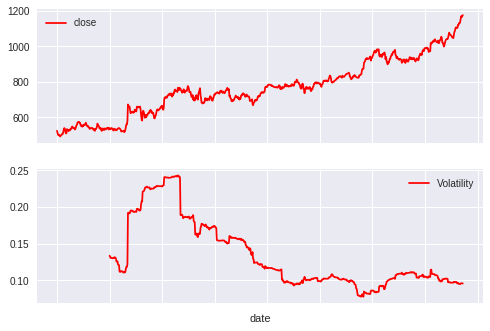

In [49]:
%matplotlib inline
f[['close', 'Volatility']].plot(subplots=True, color='red', figsize=(8, 6))